In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../results/sampling_searching'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [4]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score', 'test score global', 'performance gap', 'complexity class difference'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        summary.loc[i, 'threshold'] = exp_summary[model]['threshold']
        summary.loc[i, 'sample'] = exp_summary[model]['sample_proportion']
        summary.loc[i, 'test score'] = exp_summary[model]['test_score']
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['test score']

In [5]:
# diferencia de complejidad < 0.15, incluyo el triple de ceros (casi todo ceros y me los estoy comiendo)
summary[(summary['complexity class difference'] < 15e-2) & (summary['performance gap'] > 9e-3)]

,dataset,model,sample,threshold,test score,test score global,performance gap,complexity class difference
8,australian,SVC,0.8,0.4,0.805601,0.828872,0.023271,0.064756
11,australian,GradientBoostingClassifier,0.83,0.45,0.812149,0.844729,0.032579,0.064756
17,banknote,KNeighborsClassifier,0.07,0.85,0.981612,1.0,0.018388,0.006315
18,banknote,RandomForestClassifier,0.07,0.85,0.96328,0.996333,0.033054,0.006315
19,banknote,GradientBoostingClassifier,0.06,0.45,0.959698,0.996333,0.036636,0.006315
23,breastcancer,GradientBoostingClassifier,1.0,0.95,0.96291,0.972077,0.009167,0.074077
24,bupa,SVC,0.41,0.4,0.586004,0.616436,0.030432,0.013083
25,bupa,KNeighborsClassifier,0.58,0.5,0.508511,0.59544,0.086929,0.013083
26,bupa,RandomForestClassifier,0.17,0.25,0.568436,0.594118,0.025681,0.013083
30,cleve,RandomForestClassifier,0.4,0.15,0.773997,0.82048,0.046483,0.07597


In [6]:
# diferencia de complejidad > 0.25, incluyo la clase más compleja completa
summary[(summary['complexity class difference'] > 10e-2) & (summary['performance gap'] > 9e-3)]

,dataset,model,sample,threshold,test score,test score global,performance gap,complexity class difference
15,backache,GradientBoostingClassifier,0.94,0.45,0.556796,0.710442,0.153646,0.676355
46,flare,RandomForestClassifier,0.88,0.35,0.640107,0.655041,0.014934,0.568154
54,german_numer,RandomForestClassifier,0.78,0.3,0.715796,0.737439,0.021643,0.37219
59,haberman,GradientBoostingClassifier,0.99,0.8,0.430803,0.459537,0.028734,0.39523
74,ionosphere,RandomForestClassifier,0.82,0.9,0.940178,0.954327,0.014149,0.529861
75,ionosphere,GradientBoostingClassifier,0.78,0.75,0.953489,0.96913,0.015641,0.529861
83,liver-disorders,GradientBoostingClassifier,0.71,0.5,0.717262,0.853535,0.136273,0.245505
96,sonar,SVC,0.83,0.45,0.791374,0.883873,0.092498,0.144893
99,sonar,GradientBoostingClassifier,0.98,0.7,0.890868,0.932435,0.041567,0.144893
100,splice,SVC,0.98,0.45,0.865134,0.884967,0.019832,0.320708


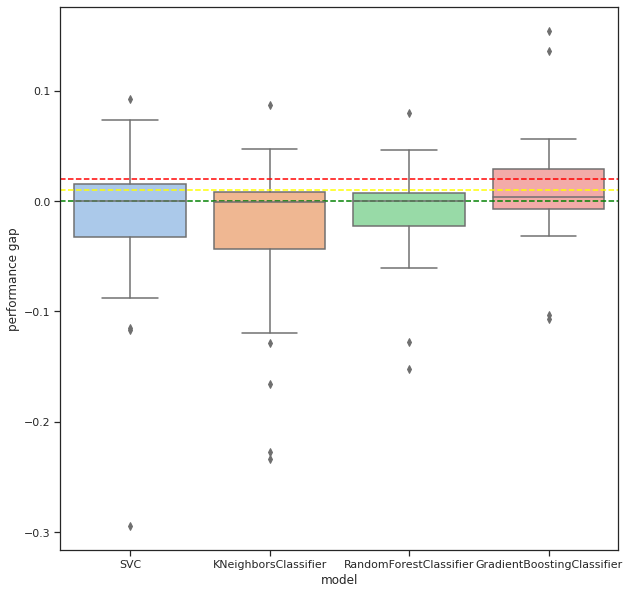

In [7]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
# plt.axhline(0.01, ls='--', c='orange')
plt.axhline(0.02, ls='--', c='red')
plt.show()

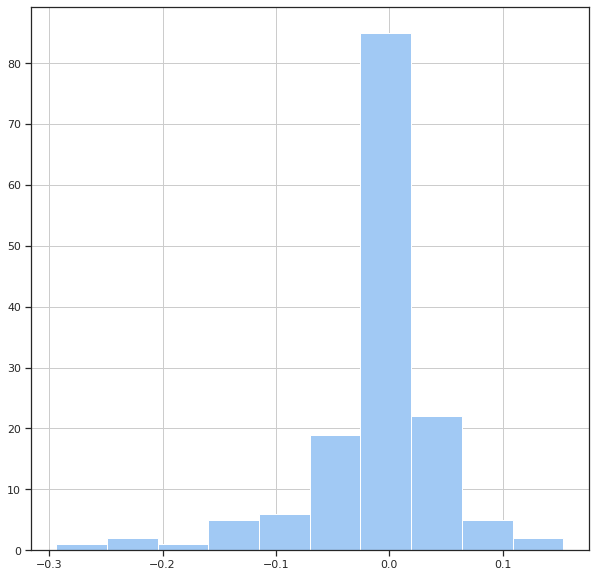

In [8]:
summary['performance gap'].hist(bins=10);

In [9]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)])

count    148.000000
mean      -0.010955
std        0.057951
min       -0.294003
0%        -0.294003
10%       -0.070190
20%       -0.033442
30%       -0.016781
40%       -0.004221
50%        0.000000
60%        0.003107
70%        0.009758
80%        0.018160
90%        0.032722
max        0.153646
Name: performance gap, dtype: float64

In [10]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]), '\n')

SVC
count    37.000000
mean     -0.016257
std       0.065854
min      -0.294003
0%       -0.294003
10%      -0.085629
20%      -0.041555
30%      -0.022828
40%      -0.008882
50%       0.000000
60%       0.003160
70%       0.011785
80%       0.019243
90%       0.033177
max       0.092498
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.000000
mean     -0.026812
std       0.068810
min      -0.233487
0%       -0.233487
10%      -0.123249
20%      -0.057930
30%      -0.031911
40%      -0.007522
50%      -0.000555
60%       0.000062
70%       0.006933
80%       0.011269
90%       0.026254
max       0.086929
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.000000
mean     -0.009965
std       0.042161
min      -0.151957
0%       -0.151957
10%      -0.058218
20%      -0.032095
30%      -0.015758
40%      -0.004852
50%       0.000000
60%       0.000000
70%       0.005379
80%       0.013284
90%       0.027714
max       0.079520
Name: performance

In [11]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['sample'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.773243
std       0.246104
min       0.010000
25%       0.710000
50%       0.820000
75%       0.950000
max       1.000000
Name: sample, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.737838
std       0.258243
min       0.010000
25%       0.620000
50%       0.790000
75%       0.940000
max       1.000000
Name: sample, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.712162
std       0.293031
min       0.010000
25%       0.560000
50%       0.780000
75%       0.970000
max       1.000000
Name: sample, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.795135
std       0.249417
min       0.010000
25%       0.710000
50%       0.830000
75%       0.980000
max       1.000000
Name: sample, dtype: float64 



In [12]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['threshold'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.574324
std       0.272749
min       0.100000
25%       0.400000
50%       0.450000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.586486
std       0.265531
min       0.100000
25%       0.350000
50%       0.600000
75%       0.800000
max       0.950000
Name: threshold, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.533784
std       0.278900
min       0.100000
25%       0.300000
50%       0.500000
75%       0.800000
max       0.950000
Name: threshold, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.608108
std       0.191672
min       0.300000
25%       0.450000
50%       0.550000
75%       0.750000
max       0.950000
Name: threshold, dtype: float64 



In [13]:
import scipy.stats as st

In [14]:
st.spearmanr(summary['test score'], summary['test score global'])[0]

0.9314676467988134